In [1]:
import scanpy as sc
import os
import anndata as ad
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import pandas as pd
import utils
import anndata as ad
import utils

In [2]:
for file in os.listdir("../Result/Anndata/Annotation/Multi_file/"): 
    tmp = sc.read_h5ad("../Result/Anndata/Annotation/Multi_file/" + file)
    tmp = tmp[~tmp.obs["annotation"].isin(["BG1", "BG2", "BG3"])]
    sample_name = file.split(".")[0].split("-")[1]
    tmp.obs["sample"] = sample_name
    globals()[sample_name] = tmp
    print(sample_name)

/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B01806B6


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B01806B5


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


D02175A4


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B01809A3


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


A02092E1


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B02008C6


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B01809A4


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B01809C2


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


D02175A6


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B02008D2


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


C02248B5


/tmp/ipykernel_8533/2946625929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs["sample"] = sample_name


B02009F6


In [3]:
control = [B01806B5, B01806B6, B01809A3, D02175A4, B01809A4, D02175A6, B02008D2]
case = [B02009F6, B02008C6, B01809C2, C02248B5, A02092E1]

In [4]:
control = ad.concat(control, join = "outer")
control.obs["diagnosis"] = "control"
case = ad.concat(case, join = "outer")
case.obs["diagnosis"] = "case"

In [5]:
merge = ad.concat([control, case], join = "outer")

In [6]:
L1 = merge[merge.obs["annotation"]=="L1"]
L2_3 = merge[merge.obs["annotation"]=="L2/3"]
L4 = merge[merge.obs["annotation"]=="L4"]
L5 = merge[merge.obs["annotation"]=="L5"]
L6 = merge[merge.obs["annotation"]=="L6"]
WM = merge[merge.obs["annotation"]=="WM"]

/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


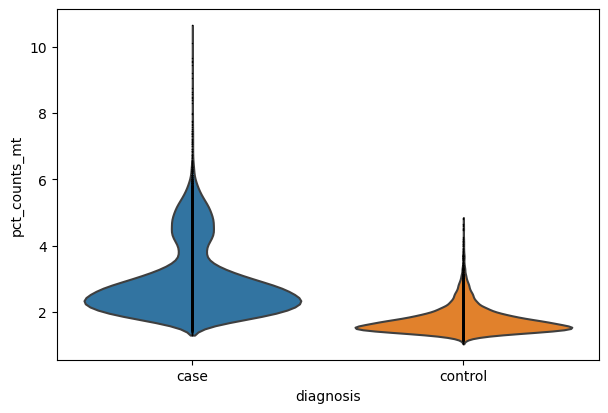

In [90]:
sc.pl.violin(WM, ['pct_counts_mt'],jitter=0,groupby="diagnosis")

In [30]:
sc.tl.rank_genes_groups(L1, 'diagnosis', method='t-test')

/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [31]:
utils.DE_table(L1, 20)

,index,Group_key,Gene_name,Value,P_adjusted
0,0,case,MT-RNR2,0.963963,0.0
1,1,case,MT-RNR1,1.158825,0.0
2,2,case,MT-TV,2.372326,0.0
3,3,case,MT-CO1,1.005051,0.0
4,4,case,MT-ND6,2.704275,0.0
5,5,case,MT-CO2,0.907947,0.0
6,6,case,MT-ATP6,0.831195,0.0
7,7,case,MALAT1,1.427639,0.0
8,8,case,MT-TL1,2.237140,0.0
9,9,case,MT-ND4,0.678729,0.0


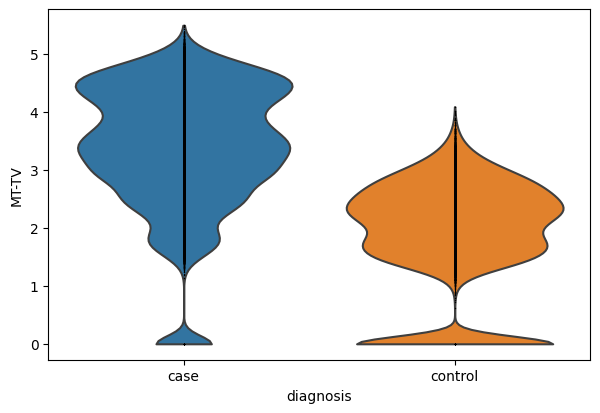

In [49]:
sc.pl.violin(L1, ["MT-TV"], groupby="diagnosis", jitter=0)

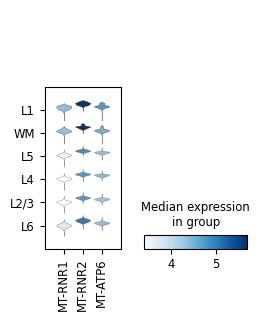

In [92]:
sc.pl.stacked_violin(
    merge, 
    ["MT-RNR1", "MT-RNR2", "MT-ATP6"], 
    groupby='annotation', 
    rotation=90
)

In [11]:
sc.tl.rank_genes_groups(L2_3, 'diagnosis', method='t-test')

/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [12]:
utils.DE_table(L2_3, 20)

,index,Group_key,Gene_name,Value,P_adjusted
0,0,case,MT-RNR1,0.608880,0.000000e+00
1,1,case,MT-RNR2,0.470107,0.000000e+00
2,2,case,MT-CO1,0.457857,0.000000e+00
3,3,case,MT-CO2,0.450647,0.000000e+00
4,4,case,MT-ND6,1.093920,0.000000e+00
5,5,case,MTCO3P13,2.404300,0.000000e+00
6,6,case,MT-TV,0.742839,1.144652e-282
7,7,case,AL669831.3,0.818661,2.790023e-256
8,8,case,MT-ATP6,0.245568,4.192197e-224
9,9,case,MTCO3P31,2.269788,1.460810e-217


In [56]:
sc.tl.rank_genes_groups(L4, 'diagnosis', method='t-test')
utils.DE_table(L4, 20)

/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


,index,Group_key,Gene_name,Value,P_adjusted
0,0,case,MT-RNR2,0.369988,0.000000e+00
1,1,case,MT-RNR1,0.450947,0.000000e+00
2,2,case,MT-CO1,0.345531,0.000000e+00
3,3,case,MT-CO2,0.258003,0.000000e+00
4,4,case,MT-ND6,0.752036,0.000000e+00
5,5,case,SLC38A2,0.989646,0.000000e+00
6,6,case,AL669831.3,0.641302,0.000000e+00
7,7,case,MTCO3P13,1.990548,0.000000e+00
8,8,case,QDPR,0.664717,1.933358e-293
9,9,case,MTCO2P12,1.334717,1.881898e-286


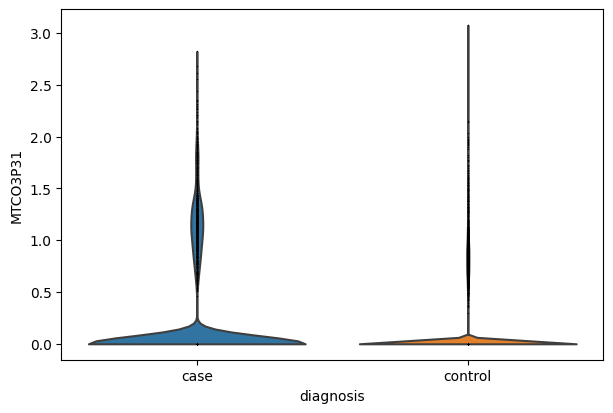

In [58]:
sc.pl.violin(L4, ["MTCO3P31"], groupby="diagnosis", jitter=0)

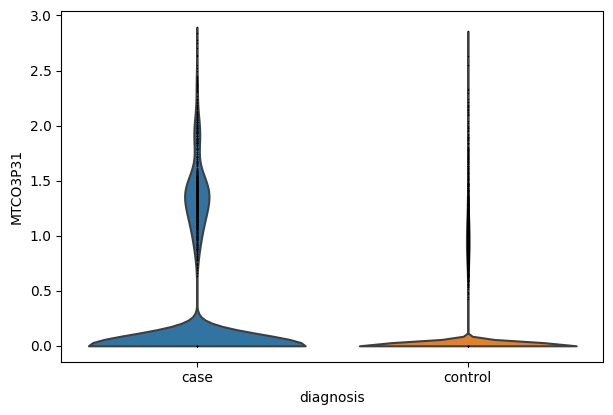

In [53]:
sc.pl.violin(L2_3, ["MTCO3P31"], groupby="diagnosis", jitter = 0)

In [61]:
WM = merge[merge.obs["annotation"]=="WM"]

In [7]:
sc.tl.rank_genes_groups(WM, 'diagnosis', method='t-test')

/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/ygong/anaconda/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [8]:
utils.DE_table(WM, 20)

,index,Group_key,Gene_name,Value,P_adjusted
0,0,case,MT-RNR2,0.849739,0.0
1,1,case,MT-RNR1,0.889960,0.0
2,2,case,MT-CO1,0.972652,0.0
3,3,case,MT-CO2,0.799515,0.0
4,4,case,MT-ATP6,0.807811,0.0
5,5,case,MT-CO3,0.795730,0.0
6,6,case,MT-TV,1.490269,0.0
7,7,case,MT-ND1,0.679549,0.0
8,8,case,MT-ND4,0.502461,0.0
9,9,case,NEAT1,1.620236,0.0


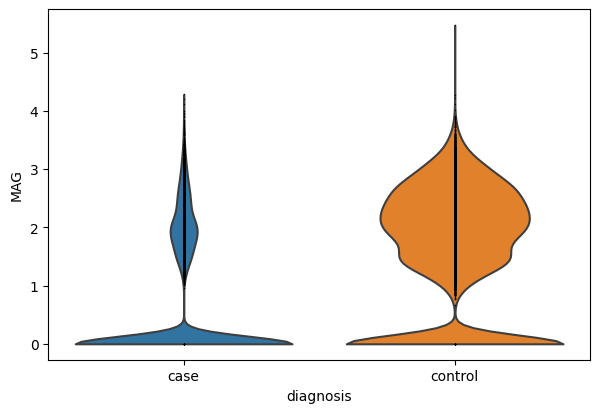

In [11]:
sc.pl.violin(WM, ["MAG"], groupby="diagnosis", jitter = 0)

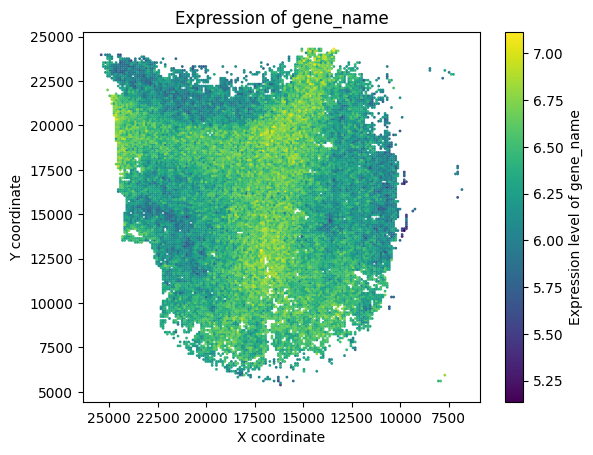

In [81]:
utils.scatter_gene(B02008C6,"MT-RNR2")

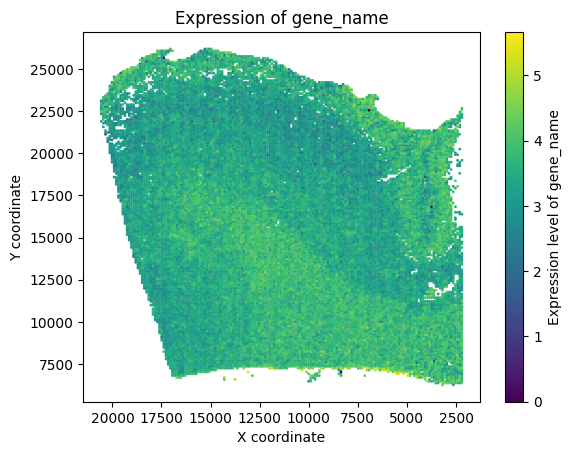

In [80]:
utils.scatter_gene(B01809A3,"MT-RNR1")

In [51]:
merge.obs

,leiden,batch,annotation,total_counts,n_genes_by_counts,pct_counts_mt,orig.ident,x,y,z,sample,diagnosis
17008070499530-0-0,4,0,L4,3726.984131,2730,1.522806,sample,3960.0,7370.0,0.0,B01806B5,control
17008070503050-0-0,2,0,WM,2926.357666,1617,1.729922,sample,3960.0,10890.0,0.0,B01806B5,control
17480516900000-0-0,7,0,L6,3092.558105,1805,1.940465,sample,4070.0,5280.0,0.0,B01806B5,control
17480516900220-0-0,3,0,L5,4427.308594,4299,1.259560,sample,4070.0,5500.0,0.0,B01806B5,control
17480516900330-0-0,3,0,L5,4282.416016,3949,1.382944,sample,4070.0,5610.0,0.0,B01806B5,control
...,...,...,...,...,...,...,...,...,...,...,...,...
5196910446530-6-6,2,6,WM,1676.360474,628,4.234606,sample,1210.0,18370.0,0.0,A02092E1,case
944892821400-6-6,2,6,WM,1012.122253,298,5.424365,sample,220.0,16280.0,0.0,A02092E1,case
1889785626740-6-6,2,6,WM,1230.704712,389,3.561178,sample,440.0,16500.0,0.0,A02092E1,case
2362232026220-6-6,2,6,WM,1308.596680,434,4.715932,sample,550.0,13420.0,0.0,A02092E1,case
